In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#checking the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*It contain Both  Numerical and Categorical Columns

*Its contails yes or no for prediction hence its a Classification model

# EDA

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We dont have any null values in the Dataset 

Now Split the data in to Categorical and Numerical Columns

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
**************************************************
Male      3555
Female    3488
Name: gender, dtype: int64
**************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
**************************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
**************************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
*************************************************

In [8]:
cat=df.select_dtypes(include=np.object).columns

In [9]:
#splitting  categorical colums from df
cat

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [12]:
#splitting numerical columns in df
num=df.select_dtypes(exclude=np.object).columns

In [13]:
num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
df["TotalCharges"].unique()

In [ ]:
# checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

*By locating the TotalCharges we can find this column has space as values but it was showing 0 missing values in this columns.

*Let's fill this column by some values and then we will convert this into float type.

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [16]:
# converting object data type to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

Since the column TotalCharges had all float numbers in the dataset but due to some reason it showed as object data type . For this reason we have converted it into float data type.

In [17]:
# let's check the null values again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since we have filled the blank spaces in TotalCharges column with nan values, it's showing 11 null values in that column. Replacing the NAN values using mean method as the column TotalCharges is continuous in nature. Let's handle the column

In [18]:
# checking the mean of TotalCharges column
df["TotalCharges"].mean()

2283.3004408418697

In [19]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

Here we have checked the mean value of TotalCharges column and replaced the missing values with its mean.

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Univarient Analysis 

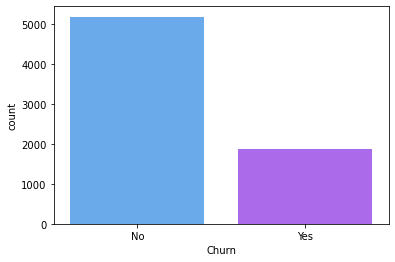

In [21]:
# visualize the number of churned customers
sns.countplot(df["Churn"],palette="cool")
plt.show()

From the count plot we can observe that the count of "No Churn" are high compared to the count of "Yes Churn". That is there are more number of customers who have not churned . This leads to class imbalance issue in the data, we will rectify it by using Oversampling method in later part.

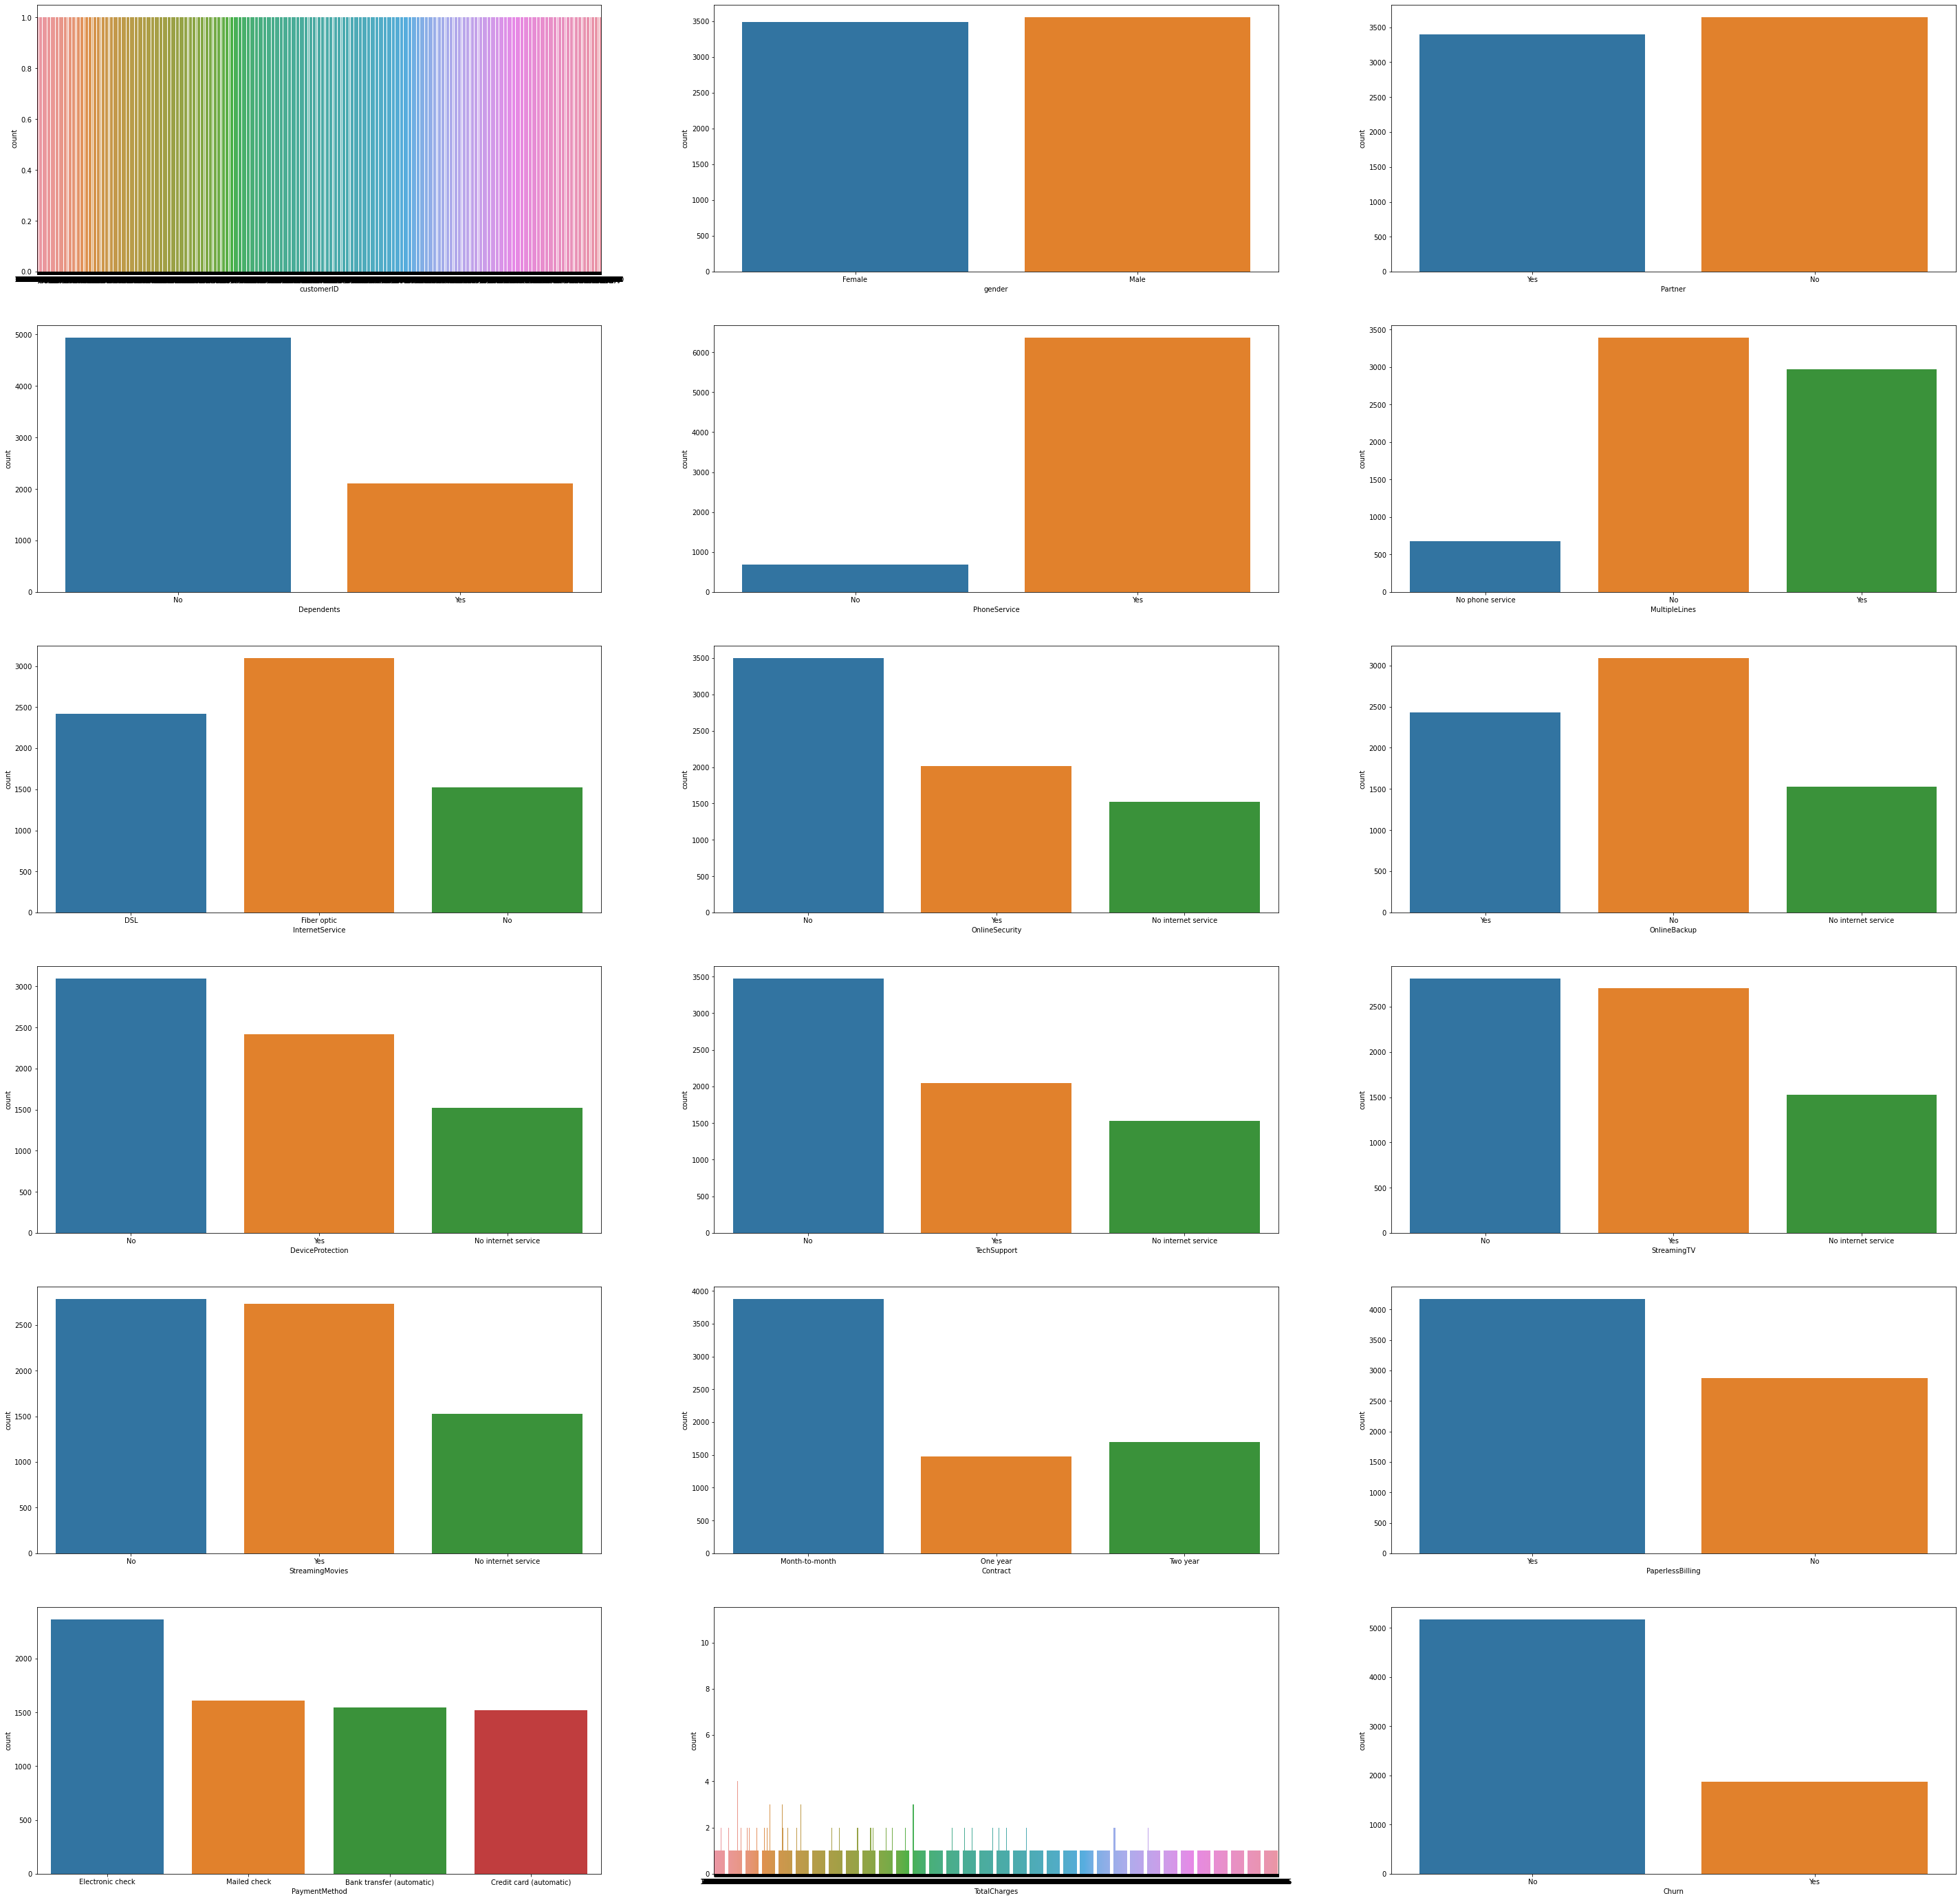

In [11]:
plt.subplots(figsize=(50,50))
plotnumber=1

for i in cat:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
    plotnumber+=1
plt.show()

From the plot we can observe the total number of male and female customers are almost same, but still the count of male is 3450 which is high comapared to count of female whcih has 3400 counts.

Here 0 represents senior citizen and 1 represent non senior citizen .The  count of senior citizen is higher then non senior citizens.The count of senior citizen is 5901 and non senior citizen is 1142

The data is almost equal ,yet the customers having partners are relatively higher compared to No.

The customers who have dependents are very less in counts that means they do not have anyone dependent on them .
Here around 70% of customers have dependents and only 29.96% have no dependents.

The customers who have phone services are large in numbers and who do not own phone services are very less in number

The customer who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Most of the customers have chosen to get Fiber optic intenet followed by DSL, but there are many customers who do not get an internet services.

It is obvious that the customers who have internet services they needs online security and who do not own any internet services, they do not need any online security . But from the count plot we can observe the majority of customers who have internet services but they do not use any online security.
It is obious that the customers who do not own internet services and online security, they do not need online backup usage.
From the plot we can see the majority of customers who own internet services they do not have Online backup and the customers who own internet services have very less online backup .

Also the customers who do not have internet services have very less online backup counts compared to others.

From the count plot we can notice that the customers without any device protection have high counts as compared to the customers who have some kind of device protection. and the customers who do not have internet access they do not need any device protection.

The customers who do not need any technical support are high in counts compared to the customers who need technical support . Around 49% of the people do not need any technical support and only 29% needs.

The customers who do not use streamin TV have little bit high in numbers than the customers who do use Streaming TV and the customers who do not own internet they do not have this service much.

Most of the customers prefer Month to Month contract compared to 1 year and 2 year contract

Most of the customers prefer paperless billing and average number of customers who do not prefer paper less billing they may like to receive paper billing.

ost of the customers prefer Electronic check payment method and the customers who prefer Mailed check, bank transfer and Credit card have average in count.



# Numerical Columns:

In [23]:
#splitting numerical columns in df
num=df.select_dtypes(exclude=np.object).columns

In [24]:
num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

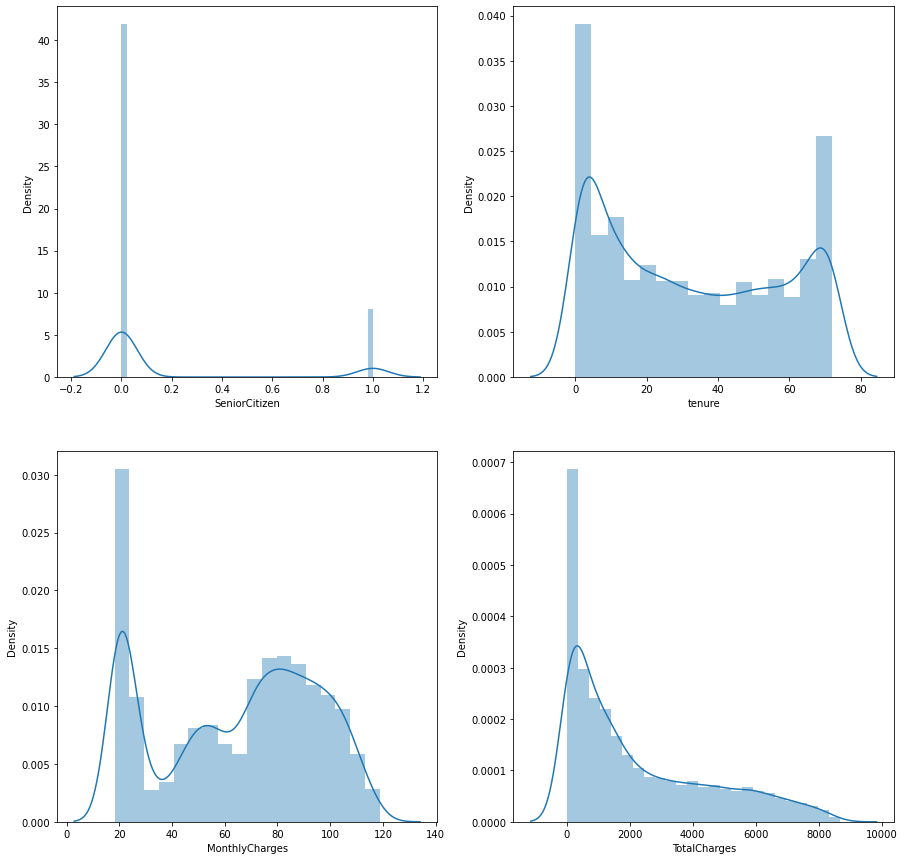

In [28]:
plt.subplots(figsize=(15,15))
plotnumber=1

for i in num:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[i])
    plotnumber+=1
plt.show()

From the above distribution plots we can notice that the data almost looks normal in all the columns except SeniorCitizen and the data in the column TotalCharges is skewed to right Other two columns tenure and MonthlyCharges do not have skewness.

# Bivarient Analysis

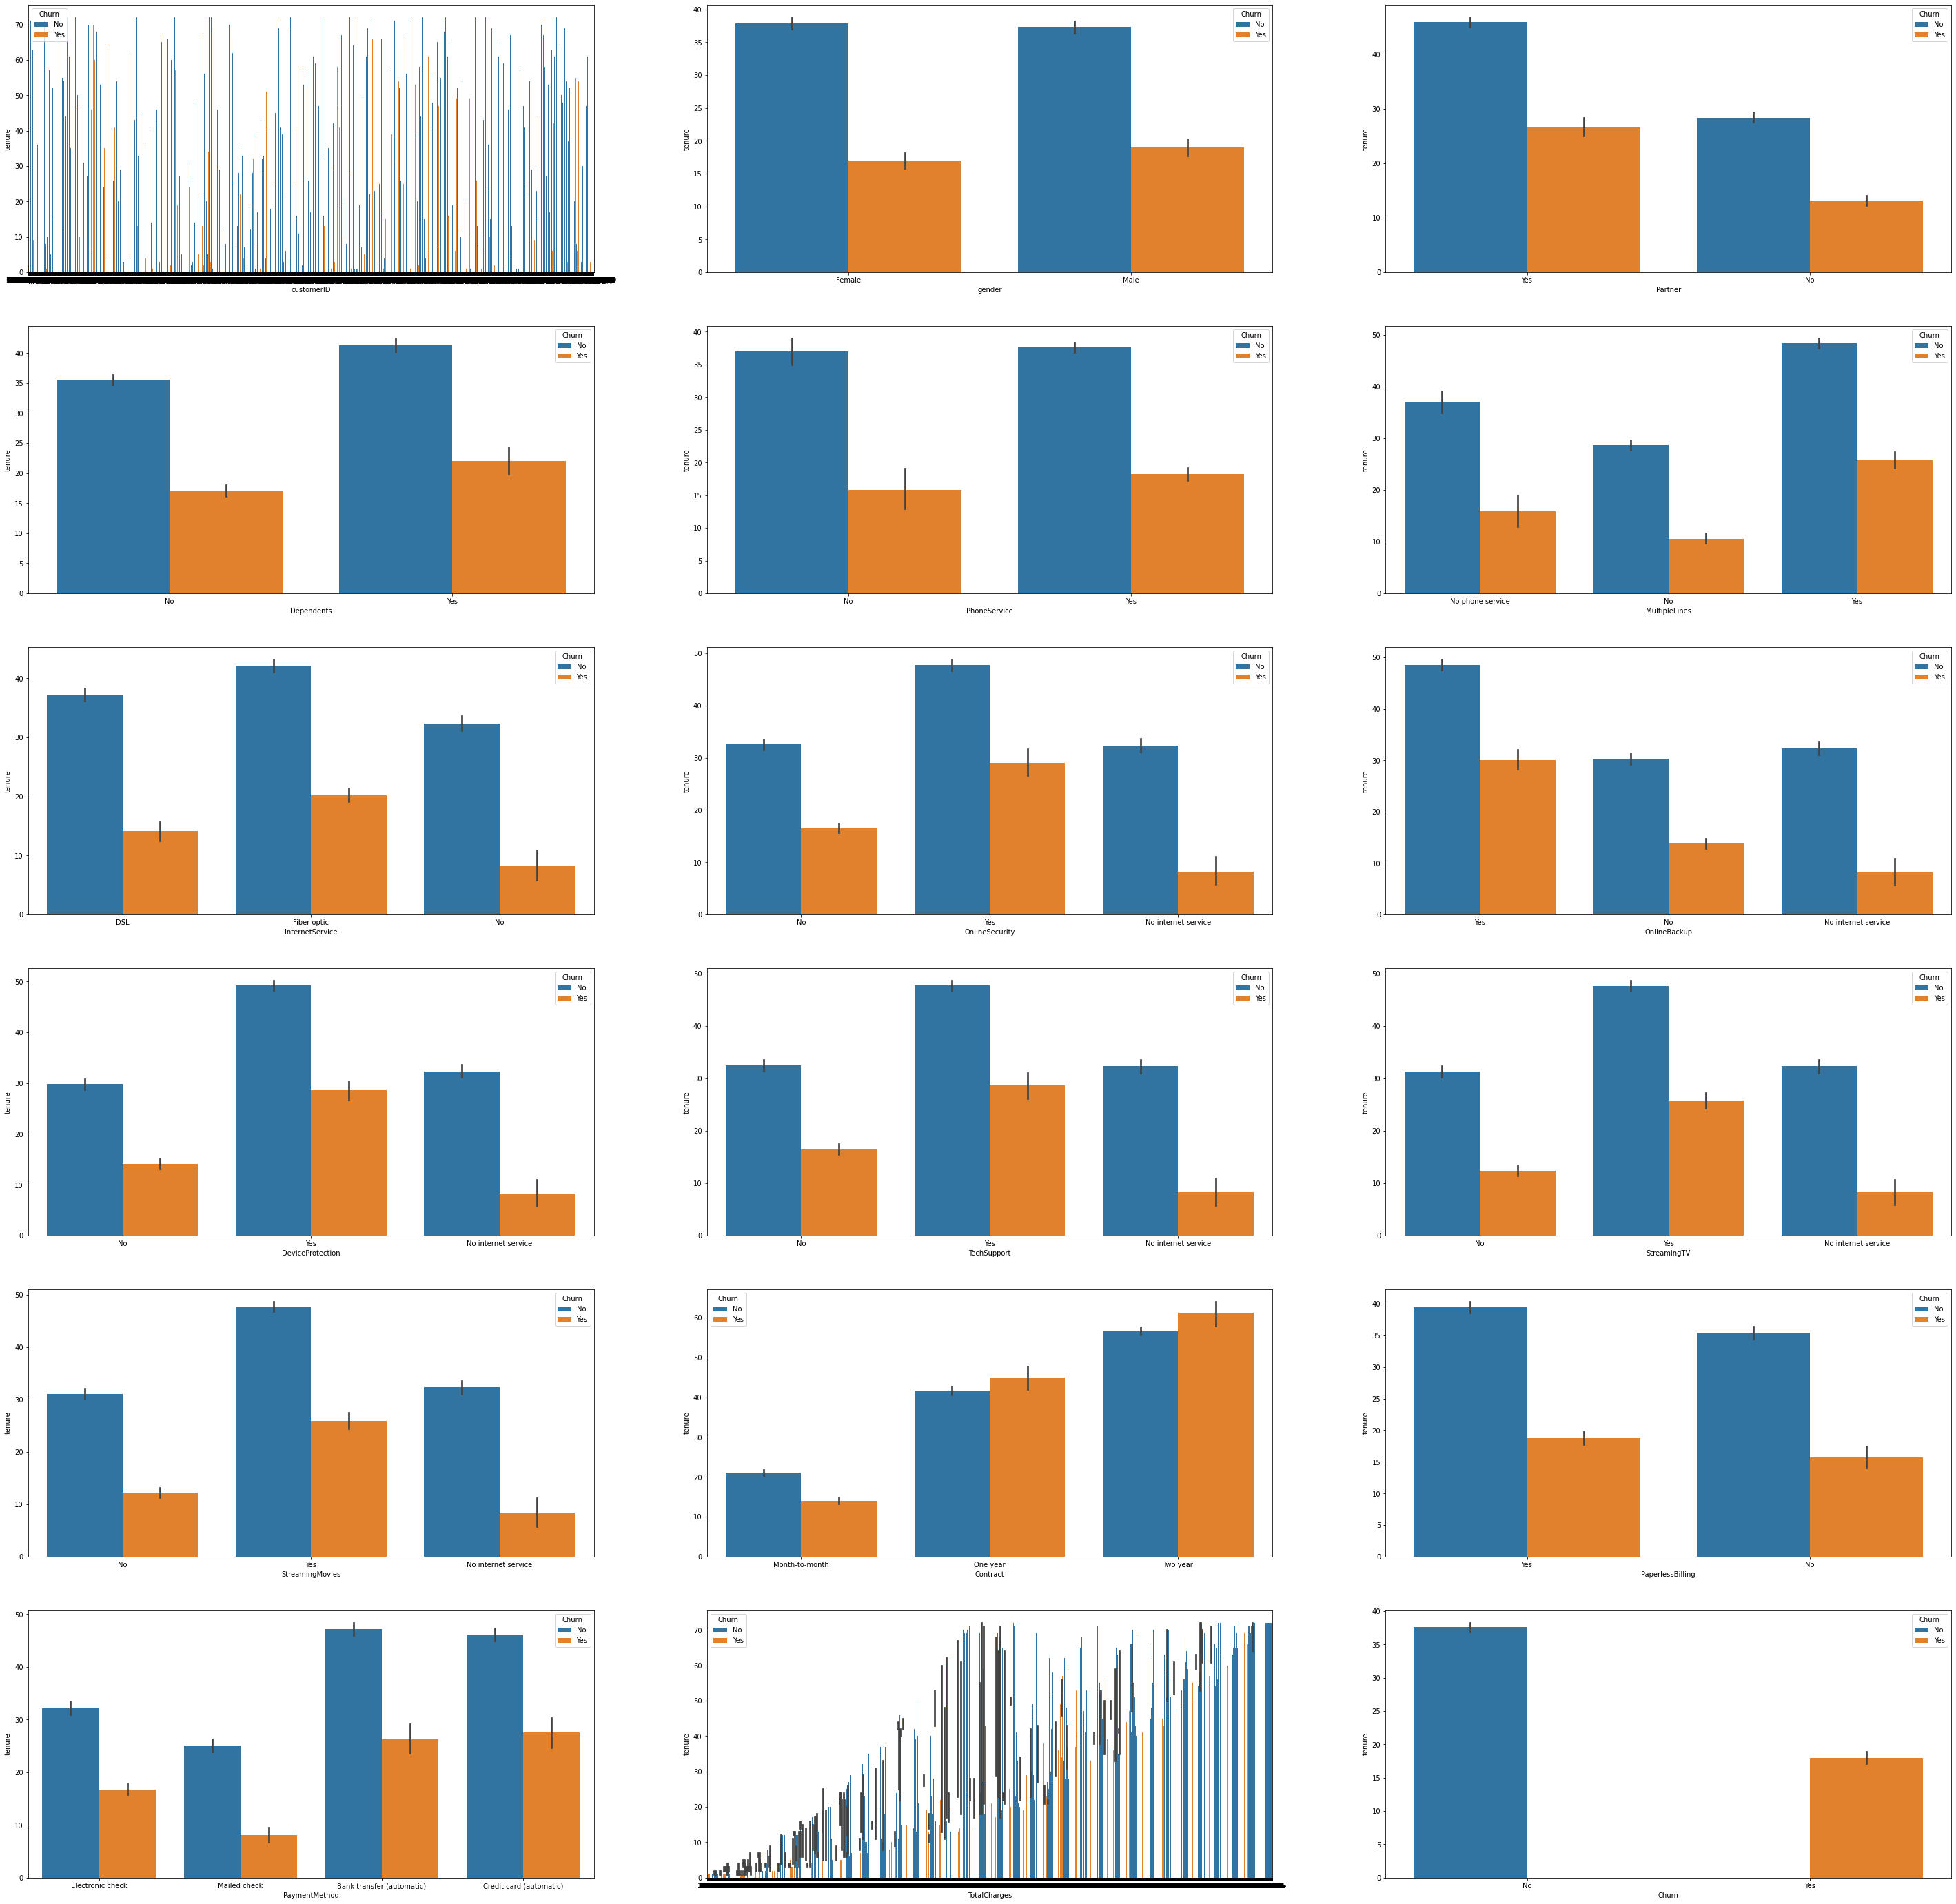

In [31]:
plt.subplots(figsize=(50,50))
plotnumber=1

for i in cat:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.barplot(x=df[i],y=df['tenure'],hue=df["Churn"]
    plotnumber+=1
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned

The customers who have dependents with high tenure, then the churned level is high 80-110.

There is no significant difference between the features, here both the feature are in equal length.

The ratio of churn is high when the customers prefer Fiber optic internet services compared to other services, may be this type of service is bad and need to be focuse on and the customers who own DSL service they have very less churn rate.

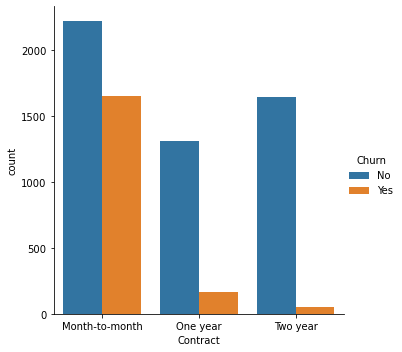

In [34]:
# checking Churn level in Contract
sns.catplot(x="Contract",hue='Churn',data=df,kind="count")
plt.show()

The customer who have churend are mostely having month to month contract

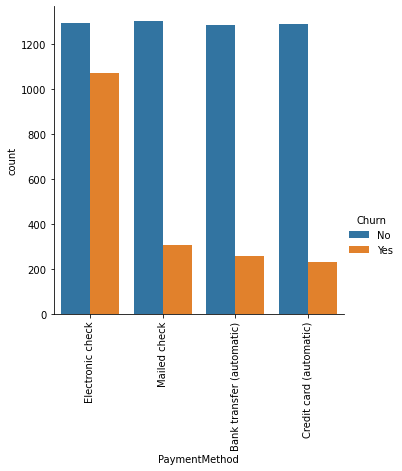

In [35]:
# checking Churn level in PaymentMethod
sns.catplot(x="PaymentMethod",hue='Churn',data=df,kind="count")
plt.xticks(rotation=90)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who existing in the company uses equal payment method.

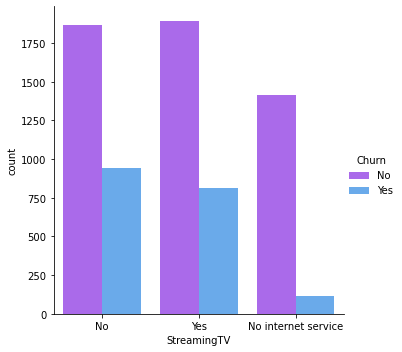

In [36]:
# checking Churn level in StreamingTV
sns.catplot(x="StreamingTV",hue='Churn',data=df,palette="cool_r",kind="count")

The churn rate is nearly same if the customer own StreamingTV or not.

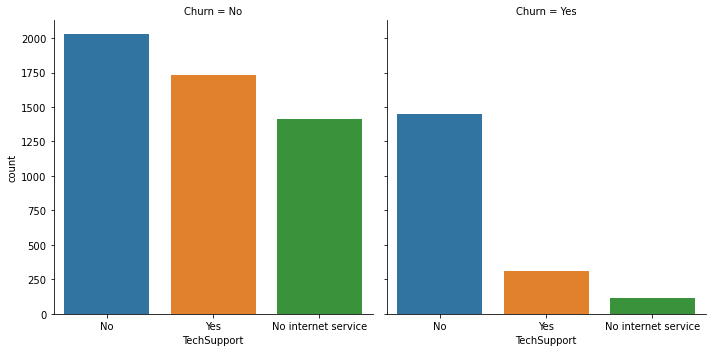

In [38]:
# checking Churn level in TechSupport
sns.catplot(x="TechSupport",col='Churn',data=df,kind="count")

Here we can clearly see that the customers who do not have any techsupport then they have high churn ration

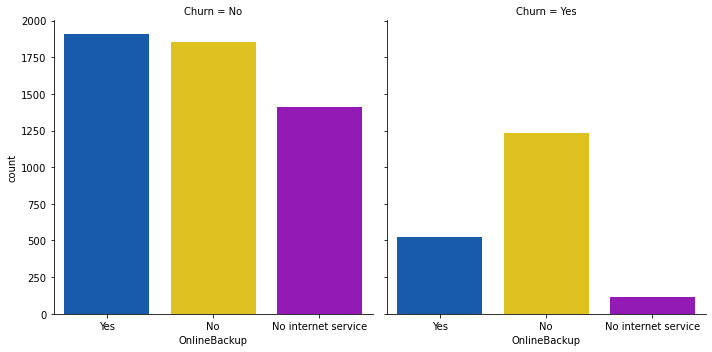

In [39]:
# checking Churn level in OnlineBackup
sns.catplot(x="OnlineBackup",col='Churn',data=df,palette="prism",kind="count")
plt.show()

It is also same as in the case of online security. It is obvious that the customers having who do not have internet services they do not need any online backup.

The customers who do not have online backup services they have high churn rate.

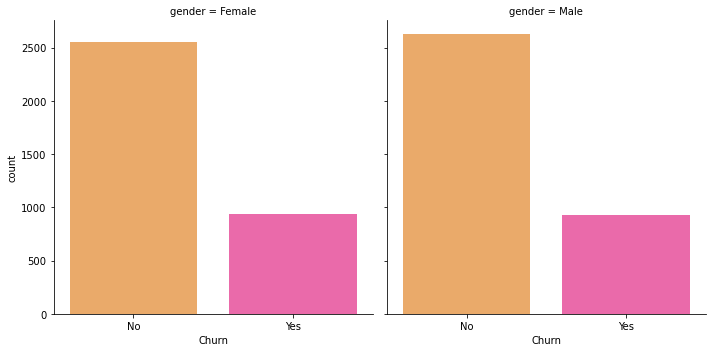

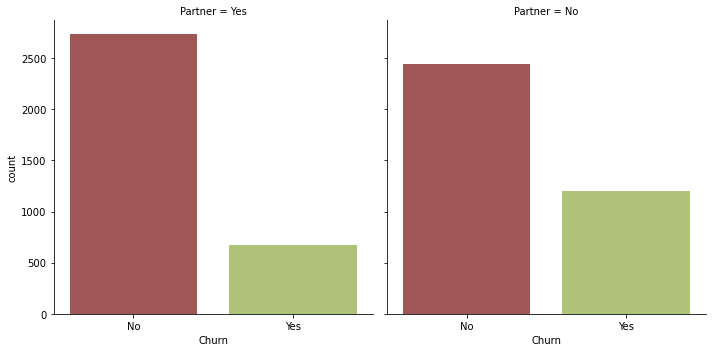

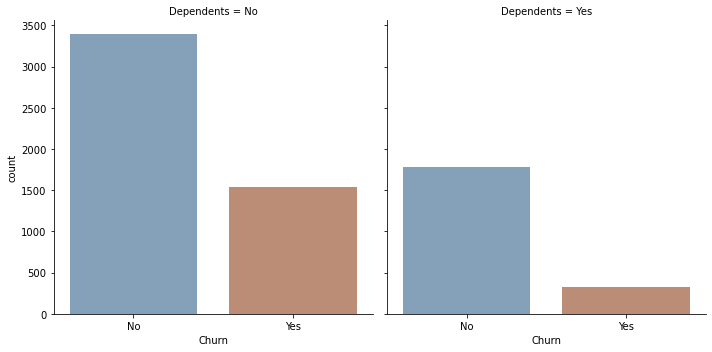

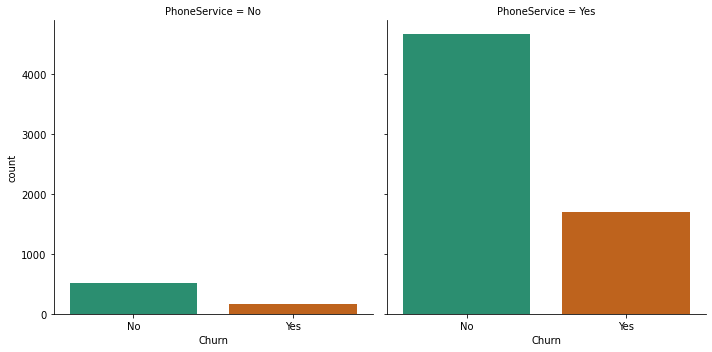

In [42]:
# checking Churn level and gender
sns.catplot(x="Churn",col='gender',data=df,kind="count",palette="spring_r")

# checking Churn level and Partner
sns.catplot(x="Churn",col='Partner',data=df,palette="tab20b_r",kind="count")

# checking Churn level and Dependents
sns.catplot(x="Churn",col='Dependents',data=df,palette="twilight_shifted",kind="count")

# checking Churn level and PhoneService
sns.catplot(x="Churn",col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

In the first plot we can see there is no significance difference in the genders, both the genders have equal churn level

In the second plot we can see the customers without partners have high churn rate compared to the customers with partners.

The customers who do not have any dependency have high churn rate compared to the customers who have dependents.

In the last plot we can notice the customers who have phone service have high tendency of getting churned

# MULTIVARIENT ANALYSIS:

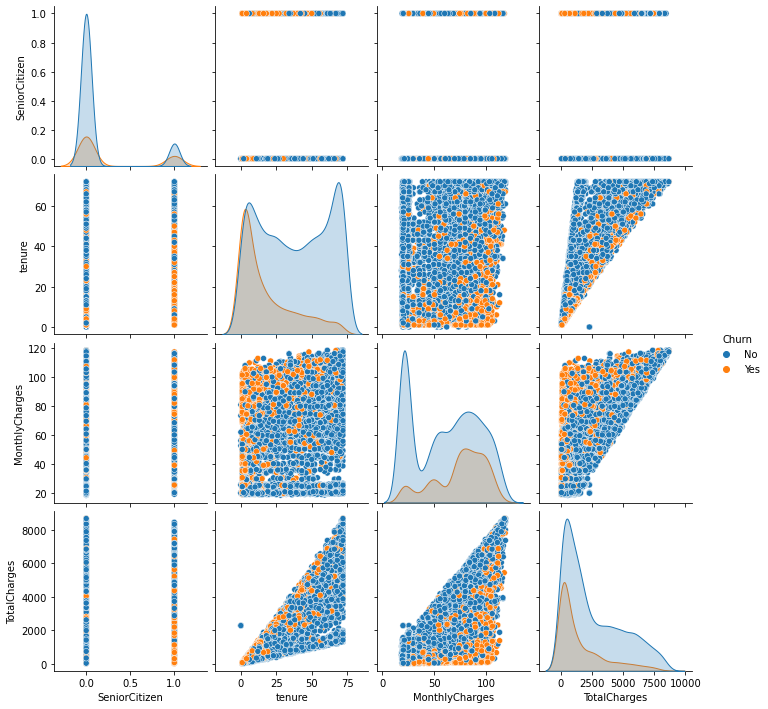

In [45]:
sns.pairplot(df,hue='Churn')

The pairplot gives the pairwise relation between the features on the basis of the target "Churn" On the diagonal we can notice the distribution plots.

The features tenure and TotalCharges, MonthlyCharges and TotalCharges have strong linear relation with each other.

There are no outliers in any of the columns but let's plot box plot to identify the outliers.

# OUTLIERS HANDLING:

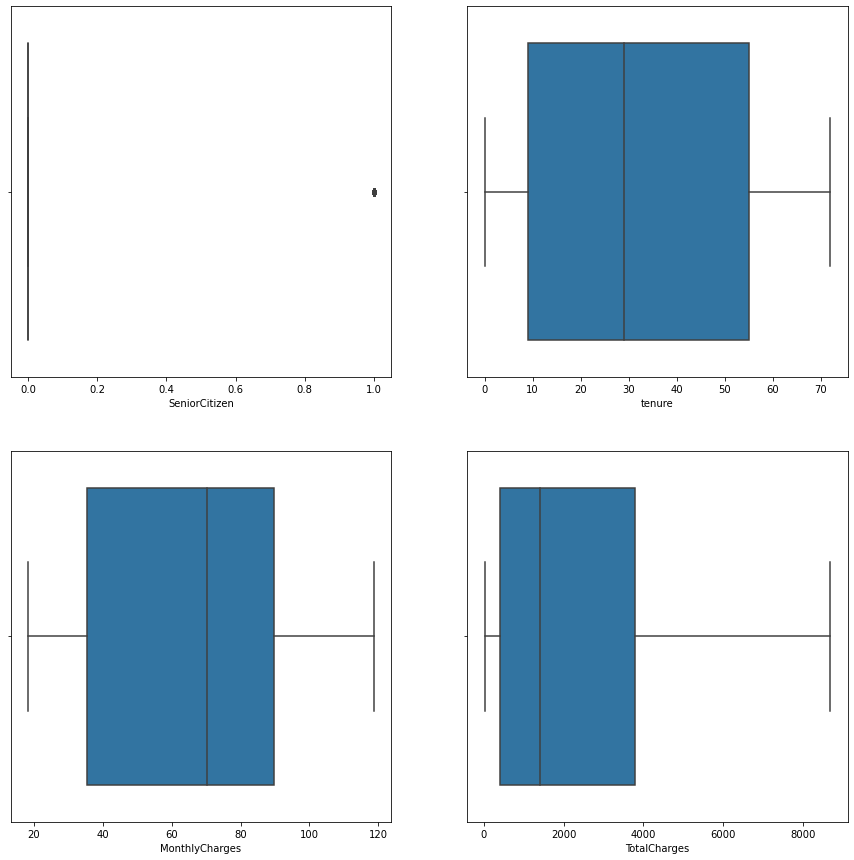

In [46]:
plt.subplots(figsize=(15,15))
plotnumber=1

for i in num:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()

There is no presence of outliers in the Numerical columns

In [47]:
#Now will check for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Here senior citizen and tenure has skewness in data set hence seniorcitizen is catogorical we are not processing that 

We will proceed with Totalcharges for removal of skewness

In [48]:
df['TotalCharges']=np.sqrt(df['TotalCharges'])

In [49]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.307849
dtype: float64

Now skewness has been removed 

We will proceed further for enoing our categorical columns

# ENCODING USING LabelEncoder()

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
LE=LabelEncoder()

In [55]:
df[cat]=df[cat].apply(LE.fit_transform)

In [56]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,74,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,3624,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,536,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,3570,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,3700,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,6305,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,1265,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,1157,1


# Now checking corr of the feature with the target

<AxesSubplot:>

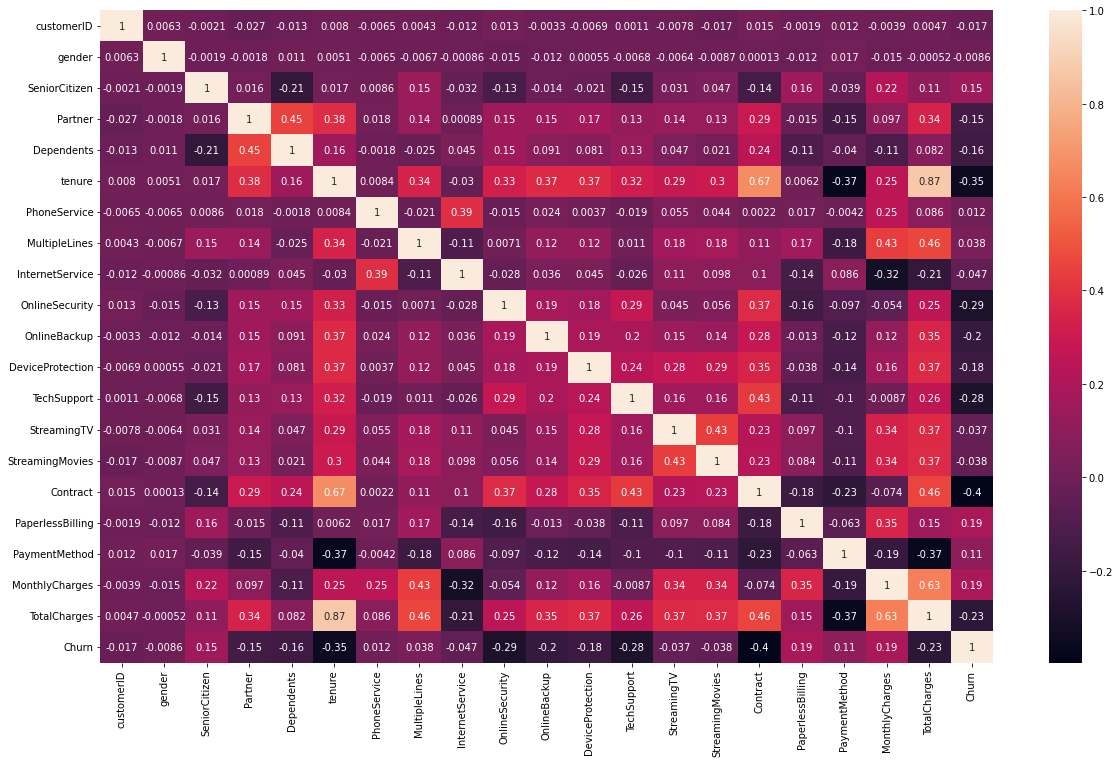

In [58]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

This heatmap shows the correlation matrix by visualizing the data we can observe the relation between feature to feature and feature to label . this heat map contains both positive and negative correlation.

There is no much positive correlation between the target and features.

The columns MonthlyCharges,PaperlessBIlling,SeniorCitizen and PaymentMethod have positive correlation with the label Churn.

The label is negatively correlated with Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very less correlation with the label we can drop it if necessary.

The columns TotalCharges and tenure, Contract and tenure,TotalCharges and MonthlyCharges and many other columns have high correlation with each other.

This leads to multicolinearity issue,to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [59]:
COR=df.corr()

In [60]:
COR

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.004697,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000524,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106887,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.342425,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.082460,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.869504,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.085612,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.463117,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.209245,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.247168,-0.289309


In [61]:
COR['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.231129
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

This shows the positive and negative corr of the feature with the target

# Seperating in to X & Y

In [66]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [67]:
x.shape

(7043, 20)

In [68]:
y.shape

(7043,)

# Standard Scaler

In [69]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.559718
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.268502
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.321792
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.240692
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.307641
7039,-0.981733,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.649194
7040,-0.075745,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.946363
7041,1.186835,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-1.001982


Lets check if we have any multicolineraity problem using VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif=pd.DataFrame()
vif['Vif_values']=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,Vif_values,Features
0,1.002442,customerID
1,1.001802,gender
2,1.149709,SeniorCitizen
3,1.463831,Partner
4,1.383374,Dependents
5,12.914484,tenure
6,1.622423,PhoneService
7,1.399731,MultipleLines
8,1.877585,InternetService
9,1.257744,OnlineSecurity


In [ ]:
we have multi colineraity issue with Ttalcharge ill drop the same from the df

In [77]:
x=x.drop('TotalCharges',axis=1)

In [78]:
vif=pd.DataFrame()
vif['Vif_values']=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,Vif_values,Features
0,1.002428,customerID
1,1.001718,gender
2,1.149640,SeniorCitizen
3,1.461971,Partner
4,1.382123,Dependents
5,2.754697,tenure
6,1.622284,PhoneService
7,1.391687,MultipleLines
8,1.825990,InternetService
9,1.247812,OnlineSecurity


after removing we could observe that the vif has almost reduced nd no multicolinearity issue in the features

# Treating Y

In [80]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

the data is imbalanced will oversample it using smote 

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
sm=SMOTE()

In [83]:
x,y=sm.fit_resample(x,y)

In [84]:
#againg checking if data is balanced or not
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# MODEL BUILDING

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  ",maxAccu," on Random_state ",maxRS)

Best accuracy is   0.8705314009661835  on Random_state  100


# TRAINING& TESTING 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [106]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Train score",m.score(x_train,y_train))
    print('Accuracy score of',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Train score 0.7739886787242856
Accuracy score of LogisticRegression() is:
0.77487922705314
[[1141  380]
 [ 319 1265]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1521
           1       0.77      0.80      0.78      1584

    accuracy                           0.77      3105
   macro avg       0.78      0.77      0.77      3105
weighted avg       0.78      0.77      0.77      3105



Train score 0.765014496755488
Accuracy score of GaussianNB() is:
0.7626409017713366
[[1102  419]
 [ 318 1266]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1521
           1       0.75      0.80      0.77      1584

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



Train score 0.8449537484467762
Accuracy score of SVC() is:
0.8132045088566827
[[1181  340]
 [ 240 1344]]
        

Here ExtraTreesClassifier gives best score of 86%

In [109]:
etc=ExtraTreesClassifier()

In [110]:
from sklearn.model_selection import GridSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para={'criterion' : ['gini','entropy'],
              'random_state' : [10,50,1000],
              'max_depth' : [0,10,20],
              'n_jobs' : [-2,-1,1],
              'n_estimators' : [50,100,200,300]}
#These are the parameters for Extra Trees Classifier.

#Running GridSearchCV for Extra Trees Classifier
grid = GridSearchCV(etc, para, scoring= "accuracy",cv = 5,n_jobs=-1,verbose=2)

grid.fit(x_train,y_train)
print("Train score",grid.score(x_train,y_train))
print("score",grid.best_score_)
print("best parameter",grid.best_params_)
print("best estimator",grid.best_estimator_)
grid_pred=grid.best_estimator_.predict(x_test) # predicting with best parameters

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Train score 0.990887753693221
score 0.8580698633845403
best parameter {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300, 'n_jobs': -2, 'random_state': 50}
best estimator ExtraTreesClassifier(max_depth=20, n_estimators=300, n_jobs=-2, random_state=50)


In [112]:
best_parameter_rfc=ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=300,random_state=50)
for i in range(2,7):
    cv=cross_val_score(etc,x,y,cv=i)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

at CV 2 The mean is  0.8534982605334365 and the SD is 0.02048705063780437
at CV 3 The mean is  0.8717671858957928 and the SD is 0.03405687578984035
at CV 4 The mean is  0.8726323927328953 and the SD is 0.03738991519550271
at CV 5 The mean is  0.8760219294251698 and the SD is 0.042653721765294486
at CV 6 The mean is  0.875056155217055 and the SD is 0.04631029372451453


In [113]:
Churn=ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=100,random_state=10)
Churn.fit(x_train, y_train)
pred=Churn.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.9243156199678


In [ ]:
The accuracy of best model increased after tuning and giving 86.92% which is very good

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,grid_pred),annot=True,fmt=".0f",linecolor="k",linewidths=3)
    
plt.title("ExtraTreesClassifier   CONFUSION MATRIX")
plt.show()

# ROC AUC CUURVE

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [117]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [118]:
y_pred_prob=etc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.1 , 0.01, 0.19, ..., 0.03, 0.  , 0.97])

In [119]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [120]:
auc_score=roc_auc_score(y_test,etc.predict(x_test))
print(auc_score)

0.8725326489749566


<Figure size 432x288 with 0 Axes>

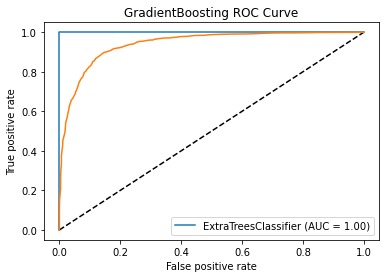

In [121]:
#Lets plott roc and auc curve
plt.figure(figsize=[6,4])
plot_roc_curve(etc,x_train,y_train)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ETC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoosting ROC Curve')
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

# CONCLUSION:

In [124]:
import numpy as np
original=np.array(y_test)
Predicted=np.array(pred)
df_com=pd.DataFrame({'Original':original,'Predicted':Predicted},index=range(len(original)))
df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
3100,1,1
3101,1,1
3102,0,0
3103,0,0


the original and predicted are almost same

Saving te Model

In [125]:
import pickle
filename='Telecom_customer_churn_prediction.pkl'
pickle.dump(etc,open(filename,'wb'))